In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [2]:
#load dataset
df_train = pd.read_csv(r'C:\Users\Keerthana V\Documents\Keerthana-D\Dataset\Titanic Survey Classifier\train.csv')
df_test = pd.read_csv(r'C:\Users\Keerthana V\Documents\Keerthana-D\Dataset\Titanic Survey Classifier\test.csv')
df_sample = pd.read_csv(r'C:\Users\Keerthana V\Documents\Keerthana-D\Dataset\Titanic Survey Classifier\gender_submission.csv')

In [3]:
print("The shape of training data  :",df_train.shape)
print("The shape of test data      :",df_test.shape)
print("The shape of sample data    :",df_sample.shape)

The shape of training data  : (891, 12)
The shape of test data      : (418, 11)
The shape of sample data    : (418, 2)


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
print("Null values in training data")
df_train.isnull().sum()

Null values in training data


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
print("Null values in test data")
df_test.isnull().sum()

Null values in test data


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [7]:
print("Null values in sample data")
df_sample.isnull().sum()
["Age","SibSp","Parch","Fare"]

Null values in sample data


['Age', 'SibSp', 'Parch', 'Fare']

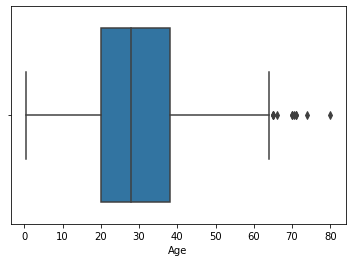

In [8]:
sns.boxplot(df_train['Age'])

In [9]:
##In the above boxplot we can see outlier above 60 .
##Find the position of outlier
print(np.where(df_train['Age']>60))

(array([ 33,  54,  96, 116, 170, 252, 275, 280, 326, 438, 456, 483, 493,
       545, 555, 570, 625, 630, 672, 745, 829, 851], dtype=int64),)


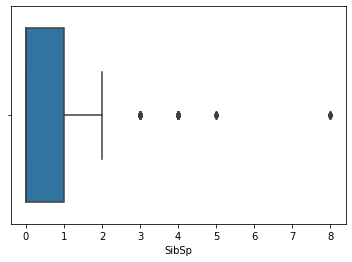

In [10]:
sns.boxplot(df_train['SibSp'])

In [11]:
np.where(df_train['SibSp']>=3)

(array([  7,  16,  24,  27,  50,  59,  63,  68,  71,  85,  88, 119, 159,
        164, 171, 176, 180, 182, 201, 229, 233, 261, 266, 278, 324, 341,
        374, 386, 409, 480, 485, 541, 542, 634, 642, 683, 686, 726, 787,
        792, 813, 819, 824, 846, 850, 863], dtype=int64),)

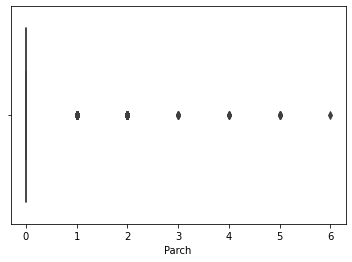

In [12]:
sns.boxplot(df_train['Parch'])

In [13]:
np.where(df_train['Parch']>=1)

(array([  7,   8,  10,  13,  16,  24,  25,  27,  43,  50,  54,  58,  59,
         63,  65,  68,  71,  78,  86,  88,  93,  97,  98, 102, 118, 119,
        124, 128, 136, 140, 145, 147, 148, 153, 155, 159, 160, 164, 165,
        166, 167, 171, 172, 175, 176, 180, 182, 183, 184, 188, 193, 197,
        201, 205, 229, 233, 237, 247, 248, 251, 254, 255, 259, 261, 262,
        266, 268, 272, 273, 278, 279, 297, 299, 305, 311, 312, 314, 318,
        319, 323, 324, 328, 329, 332, 340, 341, 348, 352, 356, 360, 362,
        374, 377, 381, 386, 390, 394, 407, 409, 416, 417, 419, 423, 424,
        435, 436, 437, 438, 440, 445, 446, 448, 450, 469, 472, 479, 480,
        485, 489, 498, 506, 523, 529, 530, 532, 533, 535, 539, 540, 541,
        542, 548, 549, 550, 558, 567, 580, 581, 585, 587, 593, 595, 600,
        608, 610, 615, 616, 618, 622, 634, 637, 638, 642, 644, 651, 657,
        659, 670, 678, 679, 683, 684, 685, 686, 689, 691, 698, 702, 709,
        720, 736, 742, 745, 746, 750, 751, 754, 755

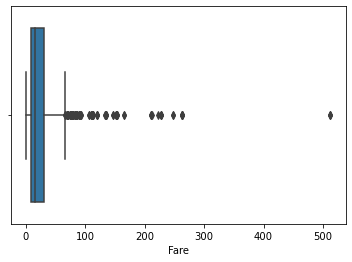

In [14]:
sns.boxplot(df_train['Fare'])

In [15]:
np.where(df_train['Fare']>70)

(array([  1,  27,  31,  34,  52,  61,  62,  72,  88, 102, 118, 120, 124,
        139, 195, 215, 218, 224, 230, 245, 256, 257, 258, 262, 268, 269,
        275, 290, 291, 297, 299, 305, 306, 307, 310, 311, 318, 319, 325,
        332, 334, 337, 341, 366, 373, 375, 377, 380, 385, 390, 393, 412,
        435, 438, 445, 453, 484, 486, 496, 498, 504, 505, 520, 527, 537,
        540, 544, 550, 557, 558, 581, 585, 587, 591, 609, 627, 645, 655,
        659, 660, 665, 679, 681, 689, 698, 700, 708, 716, 730, 737, 741,
        742, 745, 759, 763, 765, 779, 789, 802, 820, 829, 835, 849, 856,
        879], dtype=int64),)

In [16]:
def detect_outliers(df,n,features):
    outlier_indices = []
    
    #iterate over features(columns)
    for col in features:
        #1st quartile (25%)
        Q1 = np.percentile(df[col],25)
        #3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        IQR = Q3 - Q1
        
        #outlier step
        outlier_step = 1.5*IQR
        
        #Determine the list of indices of outlier for feature col
        outlier_list_col = df[(df[col] < Q1-outlier_step) | (df[col] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col)
        # select observations containing more than 2 outliers
        outlier_indices = Counter(outlier_indices)        
        multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
        return multiple_outliers

In [17]:
def detect_outliers(df,n,features):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than n outliers according
    to the Tukey method.
    """
    outlier_indices = []
    
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
         # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)

    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )

 
    
    return multiple_outliers   

In [18]:
Outliers_to_drop = detect_outliers(df_train,2,["Age","SibSp","Parch","Fare"])
df_train = df_train.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)
df_train.shape

(881, 12)

In [19]:
dataset_title = [i.split(",")[1].split(".")[0].strip() for i in df_train["Name"]]
df_train["Title"] = pd.Series(dataset_title)
df_train["Title"] = df_train["Title"].replace(['Lady', 'the Countess','Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df_train["Title"] = df_train["Title"].map({"Master":0, "Miss":1, "Ms" : 1 , "Mme":1, "Mlle":1, "Mrs":1, "Mr":2, "Rare":3})
df_train["Title"] = df_train["Title"].astype(int)
df_train.drop(labels = ["Name"], axis = 1, inplace = True)

In [20]:
def impute_age(cols):
    
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        if Pclass == 2:
            return 29
        if Pclass == 3:
            return 24
    else:
        return Age

In [21]:
def impute_fare(cols):
    
    Fare = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Fare):
        if Pclass == 1:
            return 84
        if Pclass == 2:
            return 20
        else:
            return 13
    else:
        return Fare

In [22]:
df_train['Age'] = df_train[['Age','Pclass']].apply(impute_age,axis=1)

In [23]:
sex = pd.get_dummies(df_train['Sex'],drop_first=True)
embark = pd.get_dummies(df_train['Embarked'],drop_first=True)
df_train = pd.concat([df_train,sex,embark],axis=1)

In [24]:
df_train['Family'] = df_train['SibSp'] + df_train['Parch'] +1 
df_train['Single'] = df_train['Family'].map(lambda s : 1 if s == 1 else 0)
df_train['SmallF'] = df_train['Family'].map(lambda s : 1 if s == 2 else 0)
df_train['MedF']   = df_train['Family'].map(lambda s : 1 if 3 <= s <= 4 else 0)
df_train['LargeF'] = df_train['Family'].map(lambda s : 1 if s >= 5 else 0 )
df_train['Senior'] = df_train['Age'].map(lambda s : 1 if s >60 else 0)



In [25]:
def get_person(passenger):
    age,sex = passenger
    return 'child' if age < 16 else sex

In [26]:
df_train['Person'] = df_train[['Age','Sex']].apply(get_person,axis=1)

In [27]:
dataset_title = [i.split(",")[1].split(".")[0].strip() for i in df_test["Name"]]
df_test["Title"] = pd.Series(dataset_title)
df_test["Title"] = df_test["Title"].replace(['Lady', 'the Countess','Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df_test["Title"] = df_test["Title"].map({"Master":0, "Miss":1, "Ms" : 1 , "Mme":1, "Mlle":1, "Mrs":1, "Mr":2, "Rare":3})
df_test["Title"] = df_test["Title"].astype(int)
df_test.drop(labels = ["Name"], axis = 1, inplace = True)

In [28]:
df_test['Age'] = df_test[['Age','Pclass']].apply(impute_age,axis=1)
sex = pd.get_dummies(df_test['Sex'],drop_first=True)
embark = pd.get_dummies(df_test['Embarked'],drop_first=True)
df_test = pd.concat([df_test,sex,embark],axis=1)

df_test['Fare'].fillna(value=df_test['Fare'].median(),inplace=True)

In [29]:
df_test['Fare'] = df_test[['Fare','Pclass']].apply(impute_fare,axis=1)

In [30]:
df_test["Fare"] = df_test["Fare"].map(lambda i: np.log(i) if i > 0 else 0)

In [31]:
df_test["Family"] = df_test["SibSp"] + df_test["Parch"] + 1

In [32]:
df_test['Single'] = df_test['Family'].map(lambda s: 1 if s == 1 else 0)
df_test['SmallF'] = df_test['Family'].map(lambda s: 1 if  s == 2  else 0)
df_test['MedF']   = df_test['Family'].map(lambda s: 1 if 3 <= s <= 4 else 0)
df_test['LargeF'] = df_test['Family'].map(lambda s: 1 if s >= 5 else 0)
df_test['Senior'] = df_test['Age'].map(lambda s:1 if s>60 else 0)

In [33]:
df_test['Person']  = df_test[['Age','Sex']].apply(get_person,axis=1)

person_dummies_train  = pd.get_dummies(df_train['Person'])
person_dummies_train.columns = ['Child','Female','Male']
person_dummies_train.drop(['Male'], axis=1, inplace=True)

person_dummies_test  = pd.get_dummies(df_test['Person'])
person_dummies_test.columns = ['Child','Female','Male']
person_dummies_test.drop(['Male'], axis=1, inplace=True)

df_train = df_train.join(person_dummies_train)
df_test  = df_test.join(person_dummies_test)

df_train.drop(['Person'],axis=1,inplace=True)
df_test.drop(['Person'],axis=1,inplace=True)

In [34]:
df_train.drop('male',axis=1,inplace=True)
df_test.drop('male',axis=1,inplace=True)

In [35]:
df_train.drop(['Cabin','Ticket'],axis = 1, inplace= True)
df_test.drop(['Ticket','Cabin'],axis = 1, inplace= True)

In [36]:
df_train.drop(['Sex','Embarked'],axis=1,inplace=True)
df_test.drop(['Sex','Embarked'],axis=1,inplace=True)

In [37]:
df_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
Title          0
Q              0
S              0
Family         0
Single         0
SmallF         0
MedF           0
LargeF         0
Senior         0
Child          0
Female         0
dtype: int64

In [38]:
df_test.isnull().sum()

PassengerId    0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
Title          0
Q              0
S              0
Family         0
Single         0
SmallF         0
MedF           0
LargeF         0
Senior         0
Child          0
Female         0
dtype: int64

In [39]:
X = df_train.drop('Survived',axis=1)
Y = df_train['Survived']

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state=3)

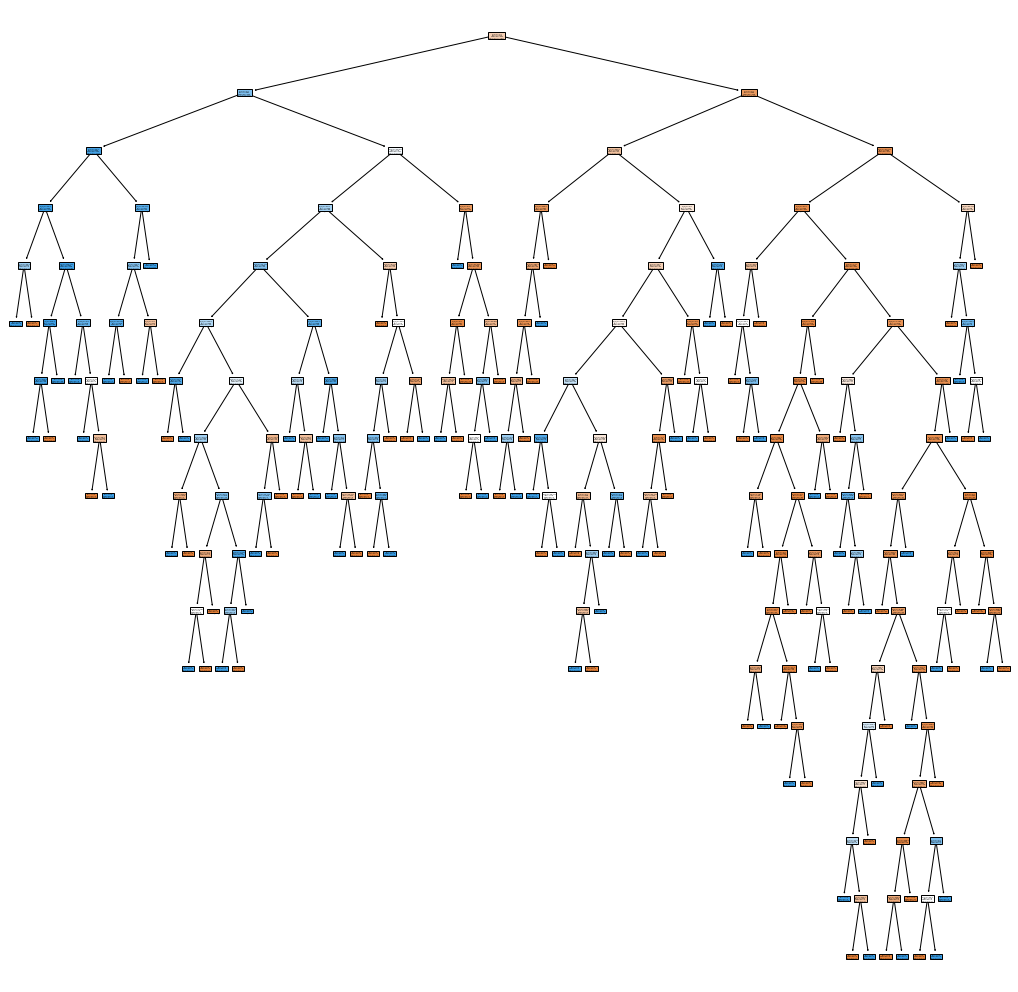

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

dt = DecisionTreeClassifier()
dt.fit(X_train,y_train);

plt.figure(figsize=(18,18))
plot_tree(dt,filled=True);

In [42]:
from sklearn.preprocessing import StandardScaler

Scaler1 = StandardScaler()
Scaler2 = StandardScaler()
X_train_scaled = Scaler1.fit_transform(X_train)
df_test_scaled = Scaler2.fit_transform(df_test)

In [43]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression(C=10).fit(X_train,y_train)

y_pred = pd.DataFrame(logmodel.predict(df_test))

y_pred['Survived'] = y_pred[0]
y_pred.drop(0,axis=1,inplace=True)
y_pred['PassengerId'] = df_test['PassengerId']
y_pred_lr = y_pred

y_pred.to_csv('titanic_pred_logistic.csv',index=False)

In [44]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(n_estimators=500,max_depth=9,min_samples_split=3)
RFC.fit(X_train,y_train)

RandomForestClassifier(max_depth=9, min_samples_split=3, n_estimators=500)

In [45]:
y_pred = pd.DataFrame(RFC.predict(df_test))

y_pred['Survived'] = y_pred[0]
y_pred.drop(0,axis=1,inplace=True)
y_pred['PassengerId'] = df_test['PassengerId']
y_pred_rf = y_pred
y_pred.to_csv('titanic_pred_rfc.csv',index=False)

In [46]:
from lightgbm import LGBMClassifier

lgb = LGBMClassifier(learning_rate=0.01,max_depth=5,n_estimators=500,num_leaves=3).fit(X_train,y_train)

In [47]:
y_pred = pd.DataFrame(lgb.predict(df_test))

y_pred['Survived'] = y_pred[0]
y_pred.drop(0,axis=1,inplace=True)
y_pred['PassengerId'] = df_test['PassengerId']
y_pred_lgb = y_pred
y_pred.to_csv('titanic_pred_lgb.csv',index=False)

In [48]:
from xgboost import XGBClassifier

XGB = XGBClassifier(max_depth=4,learning_rate=0.005,n_estimators=500,n_jobs=-1,min_child_weight=2)
XGB.fit(X_train,y_train)

[22:07:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.005, max_delta_step=0, max_depth=4,
              min_child_weight=2, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [49]:
y_pred = pd.DataFrame(XGB.predict(df_test))
y_pred['Survived'] = y_pred[0]
y_pred.drop(0,axis=1,inplace=True)
y_pred['PassengerId'] = df_test['PassengerId']
y_pred_xgb = y_pred

y_pred.to_csv('titanic_pred_xgb.csv',index=False)

In [50]:
print("XGB train score:             ",round(XGB.score(X_train,y_train),2),     "   XGB test score:           ",round(XGB.score(X_test,y_test),2))
print("Log-Reg. train score:        ",round(logmodel.score(X_train,y_train),2),"   Log-Reg. test score:      ",round(logmodel.score(X_test,y_test),2))
print("Random Forest's train score: ",round(RFC.score(X_train,y_train),2),     "   Random Forest test score: ",round(RFC.score(X_test,y_test),2))
print("LGBM train score:            ",round(lgb.score(X_train,y_train),2),     "   LGB Model test score:     ",round(lgb.score(X_test,y_test),2))

XGB train score:              0.86    XGB test score:            0.82
Log-Reg. train score:         0.83    Log-Reg. test score:       0.8
Random Forest's train score:  0.93    Random Forest test score:  0.83
LGBM train score:             0.84    LGB Model test score:      0.81


In [51]:
y_valid_xgb = XGB.predict(X_test)
y_valid_log = logmodel.predict(X_test)
y_valid_rfc = RFC.predict(X_test)
y_valid_lgb = lgb.predict(X_test)

In [52]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_valid_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

fpr_log, tpr_log, thresholds_log = roc_curve(y_test, y_valid_log)
roc_auc_log = auc(fpr_log, tpr_log)

fpr_rfc, tpr_rfc, thresholds_rfc = roc_curve(y_test, y_valid_rfc)
roc_auc_rfc = auc(fpr_rfc, tpr_rfc)

fpr_lgb, tpr_lgb, thresholds_lgb = roc_curve(y_test, y_valid_lgb)
roc_auc_lgb = auc(fpr_lgb, tpr_lgb)

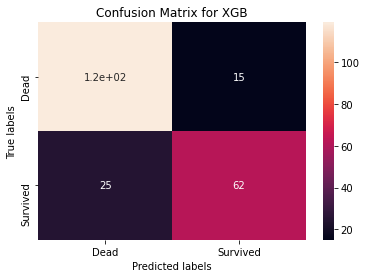

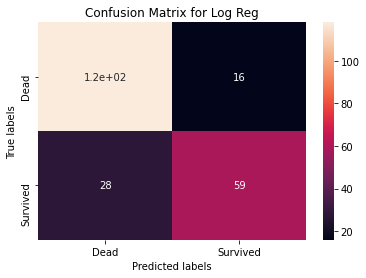

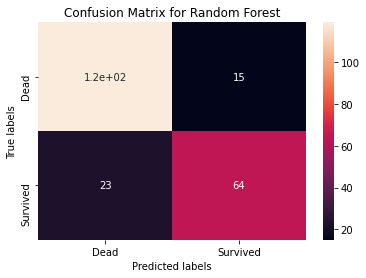

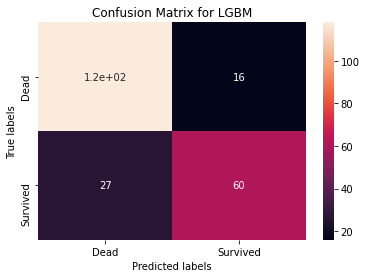

In [53]:
from sklearn.metrics import confusion_matrix

ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, y_valid_xgb), annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix for XGB'); 
ax.xaxis.set_ticklabels(['Dead', 'Survived']); ax.yaxis.set_ticklabels(['Dead', 'Survived']);
plt.show()

ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, y_valid_log), annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix for Log Reg'); 
ax.xaxis.set_ticklabels(['Dead', 'Survived']); ax.yaxis.set_ticklabels(['Dead', 'Survived']);
plt.show()

ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, y_valid_rfc), annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix for Random Forest'); 
ax.xaxis.set_ticklabels(['Dead', 'Survived']); ax.yaxis.set_ticklabels(['Dead', 'Survived']);
plt.show()

ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, y_valid_lgb), annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix for LGBM'); 
ax.xaxis.set_ticklabels(['Dead', 'Survived']); ax.yaxis.set_ticklabels(['Dead', 'Survived']);
plt.show()

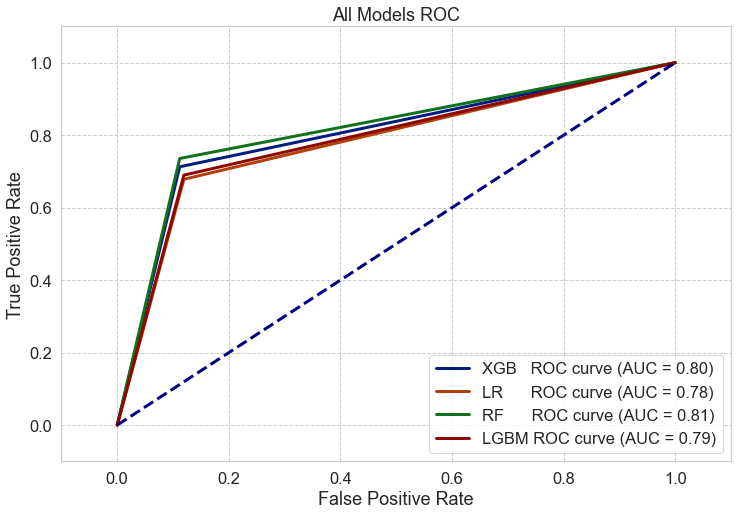

In [54]:
sns.set('talk', 'whitegrid', 'dark', font_scale=1.2,rc={"lines.linewidth": 2, 'grid.linestyle': '--'})
lw = 3
plt.figure(figsize=(12, 8))

sns.despine()
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

plt.plot(fpr_xgb, tpr_xgb, lw=lw, label='XGB   ROC curve (AUC = %0.2f)' % roc_auc_xgb);
plt.plot(fpr_log, tpr_log, lw=lw, label='LR      ROC curve (AUC = %0.2f)' % roc_auc_log);
plt.plot(fpr_rfc, tpr_rfc, lw=lw, label='RF      ROC curve (AUC = %0.2f)' % roc_auc_rfc);
plt.plot(fpr_lgb, tpr_lgb, lw=lw, label='LGBM ROC curve (AUC = %0.2f)' % roc_auc_lgb);
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('All Models ROC')
plt.legend(loc="lower right");


In [55]:
y_pred_final = y_pred
y_pred_final['Survived'] = round(  0.25 * y_pred_lgb['Survived'] 
                                 + 0.25 * y_pred_rf['Survived'] 
                                 + 0.25 * y_pred_xgb['Survived'] 
                                 + 0.25 * y_pred_lr['Survived'] )

y_pred_final['PassengerId'] = df_test['PassengerId']
y_pred_final['Survived'] = y_pred_final['Survived'].astype(int)
y_pred_final.to_csv('titanic_pred_final.csv',index=False)